In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.0.1'

# Data

three blue one brown

## Can be anything
- excel spreadsheeets, images, videos or audio

## Encode data into numerical rep
- IN A TENSOR



In [31]:
# create data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = torch.tensor([i * 0.7 + 0.3 for i in x]).reshape(x.shape)
x.shape, y.shape, x, y

(torch.Size([50, 1]),
 torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 ten

# split data into training, validation and test set
1. training is for training, 60 - 80%
2. validation set is for tuning, 10 - 20%
3. test is for model evaluation, 10 - 20%
    - The model never sees the test set

# Generalization
- The ability for a machine learning model to perform well on data it hasnt seen before


In [32]:
# train 80, test 20, scikit train test split helps with this
import random
p = 0.8
l = len(x)
print(l)
train_size = int(l * p)
print(train_size)
t_set = set(random.sample(range(l), train_size))

50
40


In [33]:
full_set = set(range(l))
test_set = full_set.difference(t_set)

In [34]:
train_indices = torch.tensor(list(t_set))
test_indices = torch.tensor(list(test_set))
X, Y = x[train_indices], y[train_indices]
x, y = x[test_indices], y[test_indices]
len(x), len(y), len(X), len(Y)

(10, 10, 40, 40)

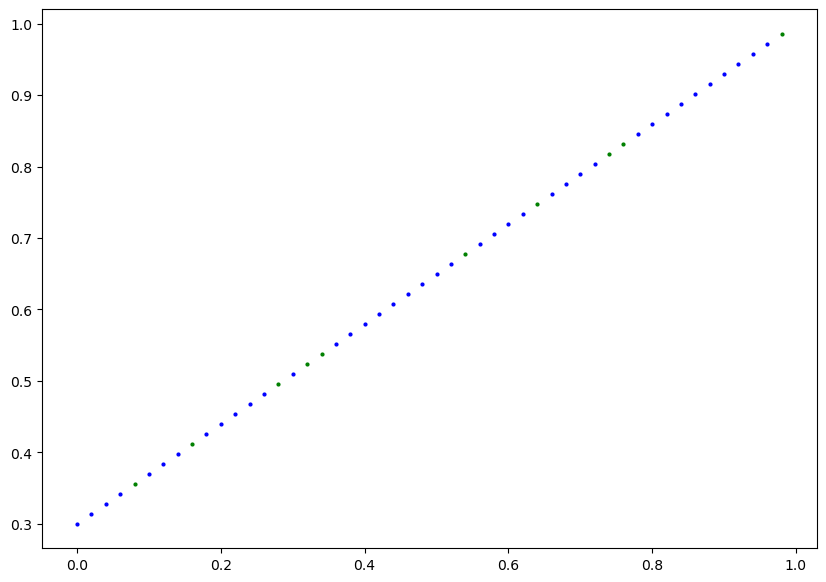

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y, c="b", s=4, label="Training data")
plt.scatter(x, y, c="g", s=4, label="testing data")

In [40]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # using this forward can i create any non linear model, each neuron is a term
        return self.weights * x + self.bias
        

nn - contains all building blocks for computational graphs
nn.Parameter - the paramters our model tries to learn
nn..Module - a prebuilt graph layer, if you subclass it, overwrite forward
optim - training algorithms

model.state_dict() summarizes model

In [41]:
# use inference mode to evaulate models
# inference mode turns off gradients
# faster than torch.no_grad()

m1 = LinearRegression()

with torch.inference_mode():
    y_preds = m1(x)
    
y_preds

tensor([[-1.7540],
        [-1.5588],
        [-1.7889],
        [-1.7958],
        [-1.5867],
        [-1.6285],
        [-1.6424],
        [-1.6494],
        [-1.8725],
        [-1.7191]])

In [60]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(m1.parameters(),
                        lr=0.01)

In [64]:
epochs = 1000
m1.train()  # train mode, turns on gradients
for i in range(epochs):
    y_preds = m1(X)
    loss = loss_fn(y_preds, Y)
    optim.zero_grad()
    loss.backward()
    optim.step()

In [68]:
with torch.inference_mode():
    y_preds = m1(x)
    
x.squeeze(dim=1), y_preds.squeeze(dim=1)

(tensor([0.6400, 0.0800, 0.7400, 0.7600, 0.1600, 0.2800, 0.3200, 0.3400, 0.9800,
         0.5400]),
 tensor([0.7375, 0.3500, 0.8068, 0.8206, 0.4054, 0.4884, 0.5161, 0.5299, 0.9728,
         0.6683]))

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.2946]))])

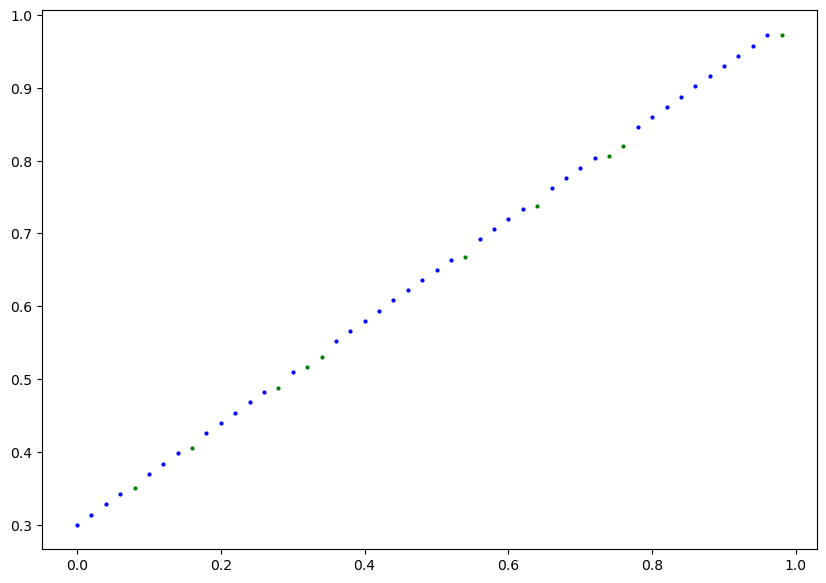

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y, c="b", s=4, label="Training data")
plt.scatter(x, y_preds, c="g", s=4, label="testing data")
m1.state_dict()

# saving model
Saving and loading pytorch tutorial
create a directory to do all your work in
    model directory
    data directory
1. torch.save() - saves model in pythons pickle format
2. torch.load() - loads saved object
3. torch.nn.Module.load_sate_dict() - saves a simple dictionairy
- Can then use kwargs and args
4. Can also just do params

# Model eval
torchmetrics

# model experimentation
torch.utils.tensorboard